In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM

gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [2]:
def create_data(X,Y):
    time_step=128;
    x_data, y_data = [], []

    for i in range(0,X.size-time_step,1):
        #x_data
        tmp = X.iloc[i:(i+time_step)]
        x_data.append(tmp)
        #y_data
        labels = Y[i:(i+time_step)]
        mode = stats.mode(labels)[0][0]
        if mode == 2 or mode == 4:
            y_data.append(1)
        if mode == 3 or mode == 5:
            y_data.append(0)
        
    return np.array(x_data), np.array(y_data).reshape(-1,1)

In [3]:
def data():
    df = pd.read_csv('../focus-detection/gsr_record.csv',header=0)
    df = df.set_index('state')
    df = df.drop([1])
    
    df_train = df.copy()
    df_train = df_train.drop([4,5])
    x_train, y_train = create_data(df_train['gsr'],df_train.index.to_list())
    
    df_test = df.copy()
    df_test = df_test.drop([2,3])
    x_test, y_test = create_data(df_test['gsr'],df_test.index.to_list())
    
    x_train = x_train.astype('float32')
    x_train -= x_train.mean(axis=0)
    x_train /= x_train.std(axis=0)
    
    x_test = x_test.astype('float32')
    x_test -= x_test.mean(axis=0)
    x_test /= x_test.std(axis=0)
    
    
    x_train = np.reshape(x_train,[x_train.shape[0],x_train.shape[1],1])
    x_test = np.reshape(x_test,[x_test.shape[0],x_test.shape[1],1])
    
    return x_train, y_train, x_test, y_test

In [4]:
def model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(LSTM({{choice([8,16,32])}}, input_shape=(x_train.shape[1],1),return_sequences=True))
    model.add(Dropout({{uniform(0,1)}}))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.fit(x_train,
              y_train,
              epochs={{choice([16,32,64])}},
              batch_size={{choice([32,64,128])}},
              validation_data=(x_test,y_test),
              shuffle=False)
    val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)
    return {'loss': -val_acc, 'status': STATUS_OK, 'model': model}

In [5]:
if __name__ == "__main__":
    best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials(),
                                          functions=[create_data],
                                         notebook_name='ml_and_tuning')

    
    x_train, y_train, x_test, y_test = data()
    val_loss, val_acc = best_model.evaluate(x_test, y_test)

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from scipy import stats
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Activation, Dropout, LSTM
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'LSTM': hp.choice('LSTM', [8,16,32]),
        'Dropout': hp.uniform('Dropout', 0,1),
        'epochs': hp.choice('epochs', [16,32,64]),
        'batch_size': hp.choice('batch_size', [32,64,128]),
    }

>>> Functions
  1: def create_data(X,Y):
  2:     time

Epoch 36/64                                          
 1/10 [==>...........................]               
 - ETA: 0s - loss: 0.6489 - acc: 0.6497              
                                                     
10/10 [==============================]               
 - 0s 10ms/step - loss: 0.6959 - acc: 0.5377 - val_loss: 0.6915 - val_acc: 0.5208

Epoch 37/64                                          
 1/10 [==>...........................]               
 - ETA: 0s - loss: 0.6437 - acc: 0.6696              
                                                     
10/10 [==============================]               
 - 0s 11ms/step - loss: 0.6938 - acc: 0.5460 - val_loss: 0.6913 - val_acc: 0.5210

Epoch 38/64                                          
 1/10 [==>...........................]               
 - ETA: 0s - loss: 0.6475 - acc: 0.6560              
                                                     
10/10 [==============================]               
 - ETA: 0s - loss: 0.694

                                                                                
5/5 [==============================]                                            
 - 0s 14ms/step - loss: 0.6847 - acc: 0.5665 - val_loss: 0.6956 - val_acc: 0.5241

Epoch 13/16                                                                     
1/5 [=====>........................]                                            
 - ETA: 0s - loss: 0.6363 - acc: 0.7990                                         
                                                                                
5/5 [==============================]                                            
 - 0s 14ms/step - loss: 0.6852 - acc: 0.5636 - val_loss: 0.6958 - val_acc: 0.5238

Epoch 14/16                                                                     
1/5 [=====>........................]                                            
 - ETA: 0s - loss: 0.6344 - acc: 0.8116                                         
                        

 - 0s 14ms/step - loss: 0.6925 - acc: 0.5787 - val_loss: 0.6978 - val_acc: 0.5199

Epoch 30/32                                                                     
1/5 [=====>........................]                                            
 - ETA: 0s - loss: 0.6188 - acc: 0.8523                                         
                                                                                
5/5 [==============================]                                            
 - 0s 15ms/step - loss: 0.6920 - acc: 0.5838 - val_loss: 0.6976 - val_acc: 0.5199

Epoch 31/32                                                                     
1/5 [=====>........................]                                            
 - ETA: 0s - loss: 0.6178 - acc: 0.8572                                         
                                                                                
5/5 [==============================]                                            
 - 0s 15ms/step - loss: 

10/10 [==============================]                                          
 - 0s 11ms/step - loss: 0.6806 - acc: 0.6428 - val_loss: 0.6865 - val_acc: 0.5379

Epoch 30/32                                                                     
 1/10 [==>...........................]                                          
 - ETA: 0s - loss: 0.6242 - acc: 0.8323                                         
                                                                                
10/10 [==============================]                                          
 - 0s 11ms/step - loss: 0.6791 - acc: 0.6462 - val_loss: 0.6858 - val_acc: 0.5397

Epoch 31/32                                                                     
 1/10 [==>...........................]                                          
 - ETA: 0s - loss: 0.6238 - acc: 0.8351                                         
                                                                                
10/10 [=================

In [6]:
print(best_model.summary())
print(best_run)
print("val_loss: ", val_loss)
print("val_acc: ", val_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 16)           1152      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 16)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 128, 1)            17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None
{'Dropout': 0.41266207281071243, 'LSTM': 1, 'batch_size': 1, 'epochs': 1}
val_loss:  0.6846697330474854
val_acc:  0.5420185923576355


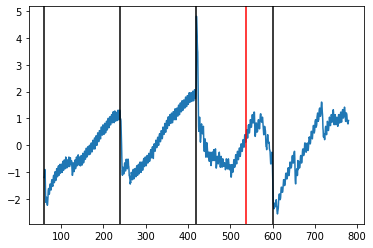

In [81]:
import matplotlib.pyplot as plt
df = pd.read_csv('./gsr_record.csv',header=0)
df = df.set_index('state')
df = df.drop([1])
df['gsr'].loc[2:3] -= df['gsr'].loc[2:3].mean(axis=0)
df['gsr'].loc[2:3] /= df['gsr'].loc[2:3].std(axis=0)
df['gsr'].loc[4:5] -= df['gsr'].loc[4:5].mean(axis=0)
df['gsr'].loc[4:5] /= df['gsr'].loc[4:5].std(axis=0)
plt.plot(df.loc[:,'sec'],df.loc[:,'gsr'])
plt.axvline(60,color='black')
plt.axvline(240,color='black')
plt.axvline(420,color='black')
plt.axvline(538,color='red')
plt.axvline(600,color='black')

In [23]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(592, 128, 1) (592, 1) (592, 128, 1) (592, 1)


In [103]:
result = best_model.predict(x_test)

In [104]:
result.shape, x_test[0:1].shape

((592, 128, 1), (1, 128, 1))

In [131]:
result.shape

(592, 128, 1)

In [132]:
tmp = []
for i in range(0,592):
    tmp.append(np.average(result[i]))